In [155]:
import json
import networkx as nx
import matplotlib.pyplot as plt
from random import choices

In [156]:
# Create a pheromone matrix or graph
def initialize_pheromone(graph):
    pher_g = {k: {e: 1.0 for e in v} for k, v in graph.items()}
    return pher_g

In [157]:
# Let ants travel between node 0 and 29 at random and keep store of path
def ant(pher_g, graph, node='0', goal='29'):
    path, nset = [], set()
    cost = 0
    while node != goal:
        path.append(node)
        nset.add(node)
        next_node = choices(
            list(pher_g[node].keys()),
            list(pher_g[node].values())
        )[0]
        cost += graph[node][next_node]['weight']
        node = next_node
    path.append(node)
    return path, cost

In [158]:
# Update pheromone matrix according to the path and its travel cost
def update_pheromone(pher_g, paths_with_costs, evaporation_rate=0.1):
    for path, cost in paths_with_costs:
        if path is not None:
            pheromone_to_deposit = 1 / cost
            for i in range(len(path) - 1):
                pher_g[path[i]][path[i + 1]] += pheromone_to_deposit
                pher_g[path[i]][path[i + 1]] *= (1 - evaporation_rate)

In [159]:
# Visualize the result with different colors for paths
def visualize(g, pos, aco_path, dijk_path):
    nx.draw_networkx(g, pos, with_labels=True)
    plt.rcParams["figure.figsize"] = (20, 10)
    aco_edges = [(aco_path[i], aco_path[i + 1]) for i in range(len(aco_path) - 1)]
    nx.draw_networkx_edges(g, pos, edgelist=aco_edges, edge_color="r", width=2)

    dijk_edges = [(dijk_path[i], dijk_path[i + 1]) for i in range(len(dijk_path) - 1)]
    nx.draw_networkx_edges(g, pos, edgelist=dijk_edges, edge_color="b", width=2)

    plt.plot([], [], 'r', label='ACO Path')
    plt.plot([], [], 'b', label='Dijkstra Path')

    plt.legend(loc='upper right', fontsize='large')

In [160]:
# Load Graph
filename = 'graph.json'
with open(filename, 'r') as fl:
    graph = json.load(fl)

In [161]:
g = nx.from_dict_of_dicts(graph, create_using=nx.DiGraph())

# Initial Pheromone Graph
pher_g = initialize_pheromone(graph)

In [162]:
# Let ants traverse the graph and store paths and their costs
ant_paths_with_costs = [ant(pher_g, graph) for _ in range(100)]

# Update Pheromone
update_pheromone(pher_g, ant_paths_with_costs)

In [163]:
# Choose the best path based on cost
best_path, best_cost = min(ant_paths_with_costs, key=lambda x: x[1])

print(f"Best ACO Path: {best_path} with Cost: {best_cost}")

Best ACO Path: ['0', '4', '15', '20', '24', '28', '29'] with Cost: 0.05473238422771074


In [164]:
# Position for all nodes
pos = nx.spring_layout(g, k=0.1, iterations=100)

# Compare with the shortest path(s) using Dijkstra
dijk_p = nx.dijkstra_path(g, '0', '29', weight='weight')
dijk_cost = sum(graph[dijk_p[i]][dijk_p[i + 1]]['weight'] for i in range(len(dijk_p) - 1))

print(f"Dijkstra Path: {dijk_p} with Cost: {dijk_cost}")

Dijkstra Path: ['0', '4', '15', '22', '27', '29'] with Cost: 0.0411065384805345


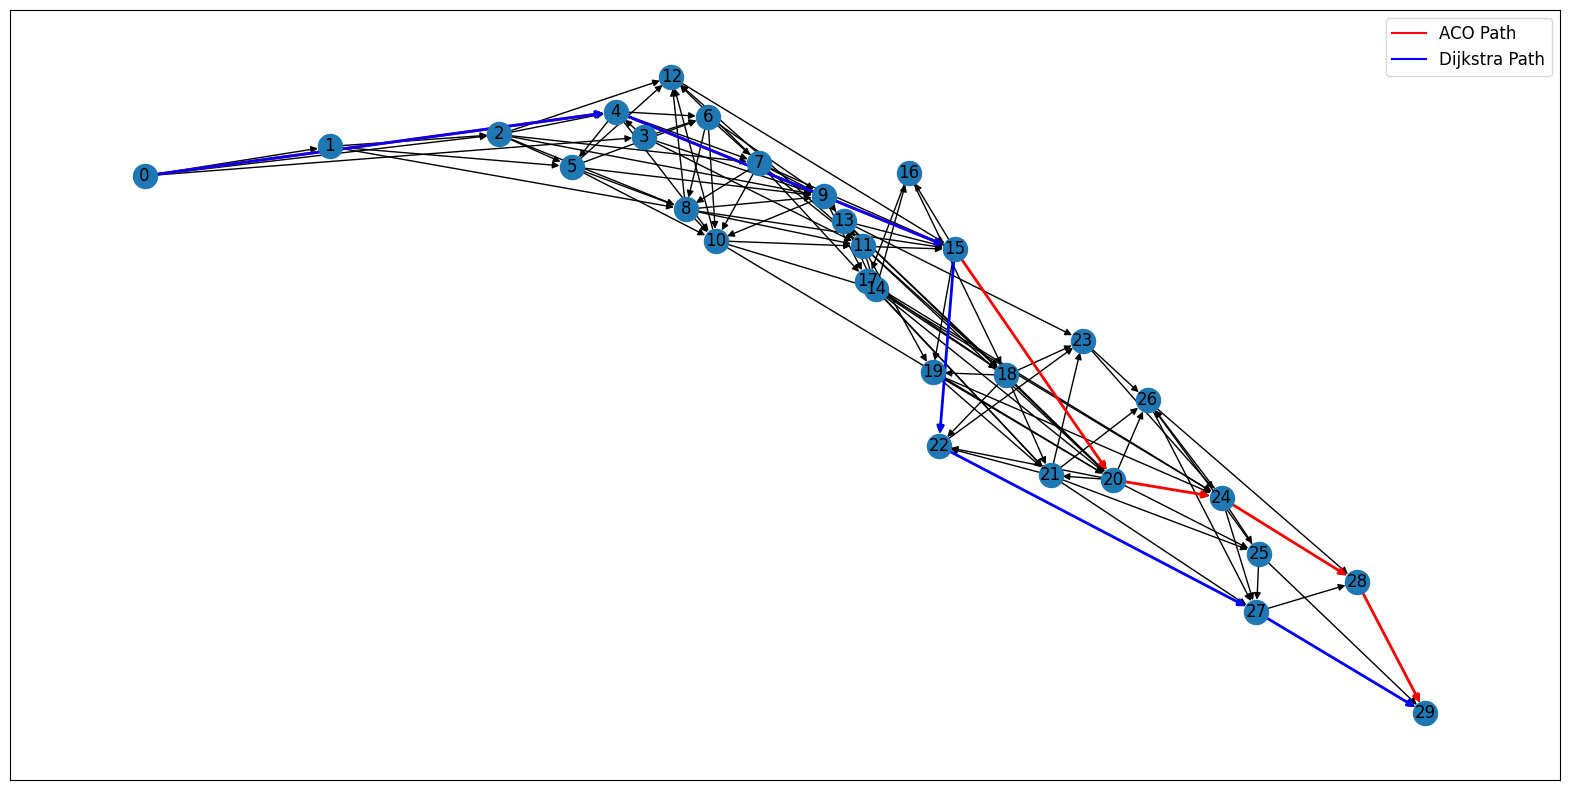

In [165]:
# Visualize the graph with paths
visualize(g, pos, best_path, dijk_p)

# Show the plot
plt.show()